In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import nxviz as nv
import matplotlib.pyplot as plt
import networkx as nx

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
data2=pd.read_csv("Pokemon.csv")
data2.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


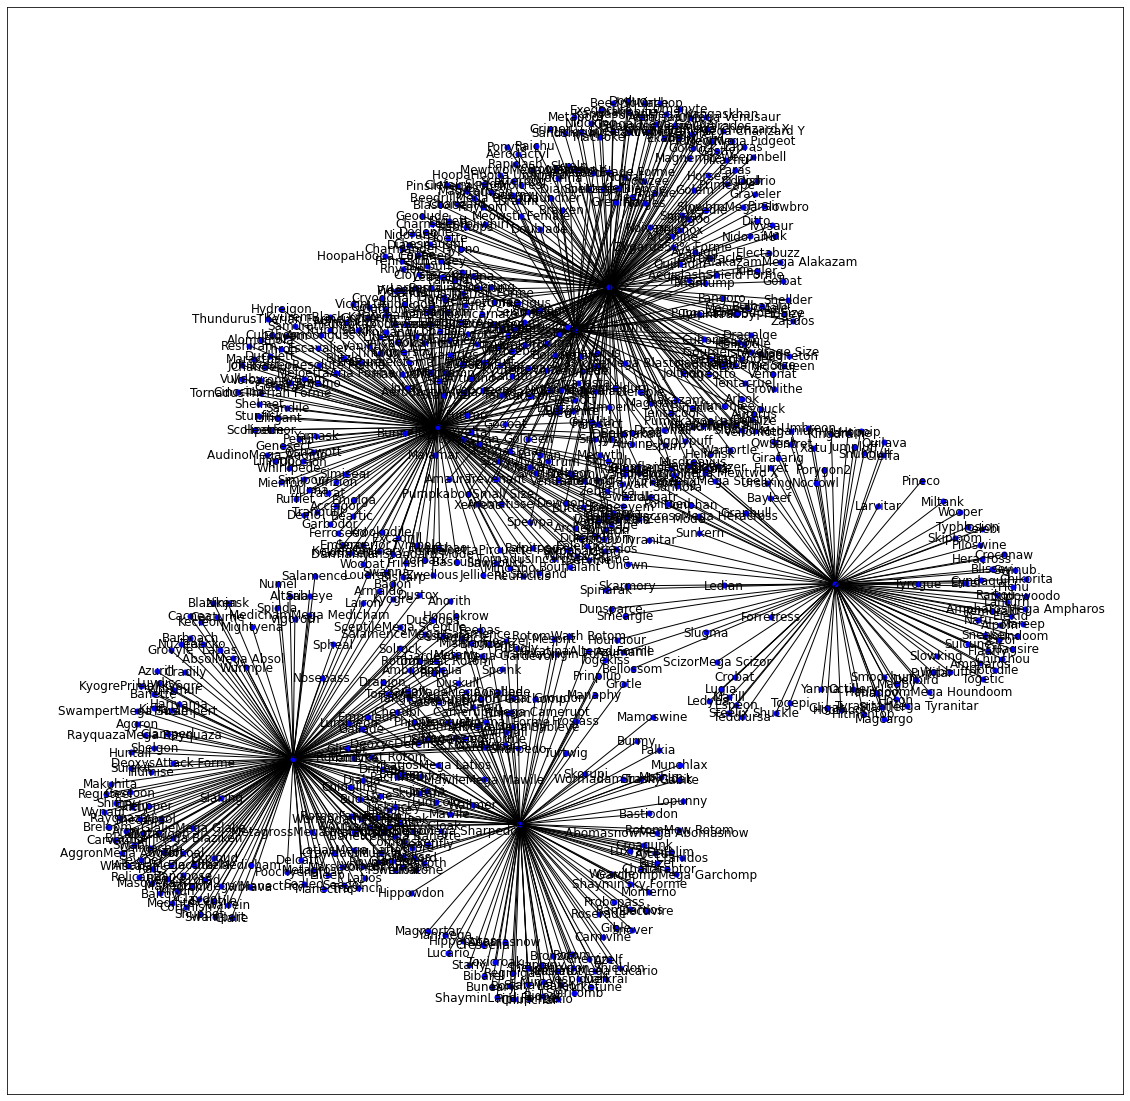

In [3]:
g = nx.Graph()
g = nx.from_pandas_edgelist(data2,'Name','Generation')
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='blue')
plt.show()

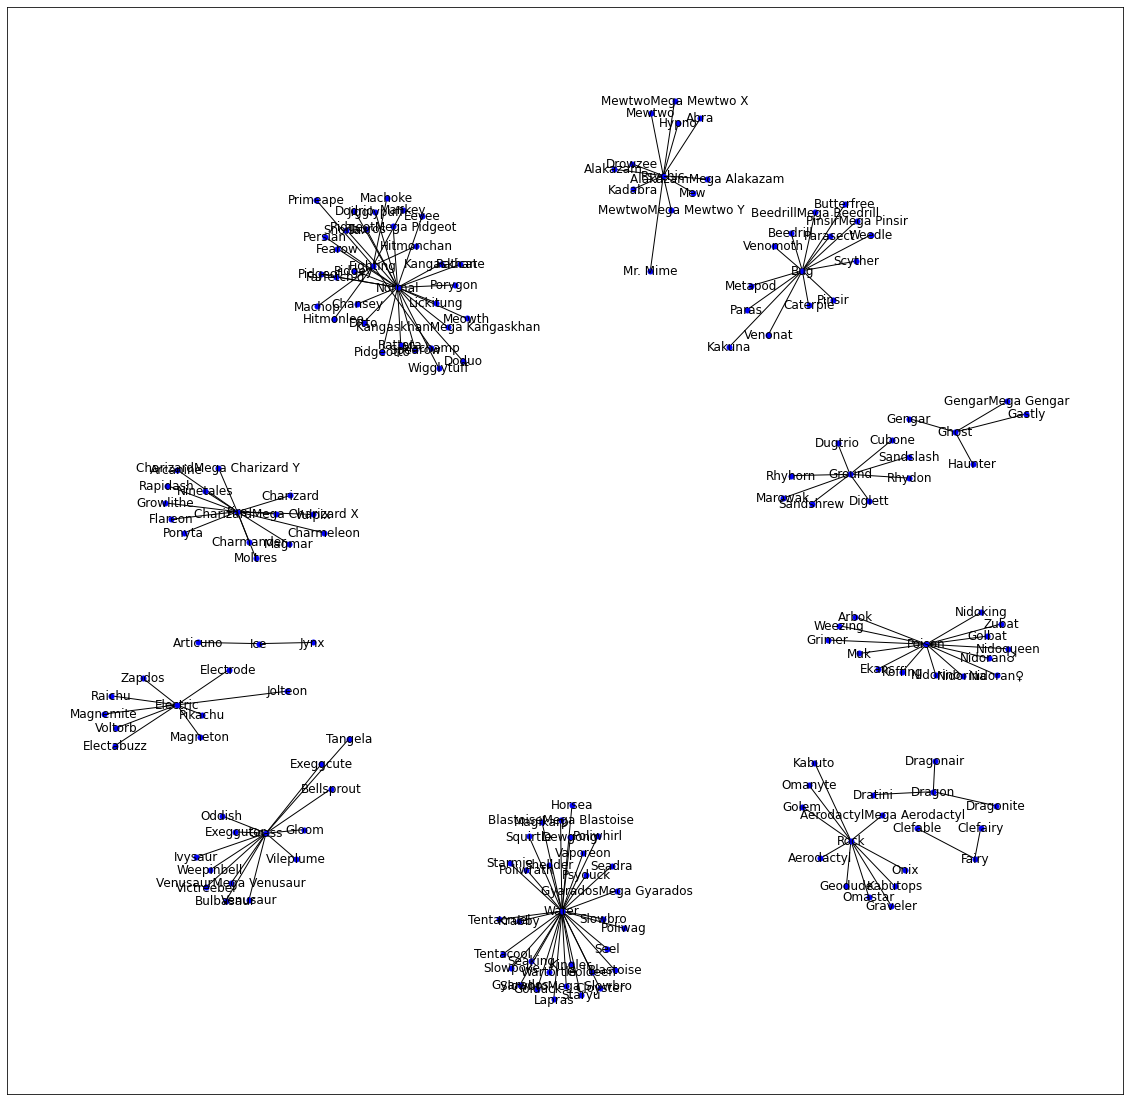

In [17]:
##sub graphs of 1st gen pokemon by their types

data2_gen1=data2.loc[data2['Generation'] == 1]
# data2.loc[data2['Generation'] == '1']

g = nx.from_pandas_edgelist(data2_gen1,'Name','Type 1')
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='blue')
plt.show()

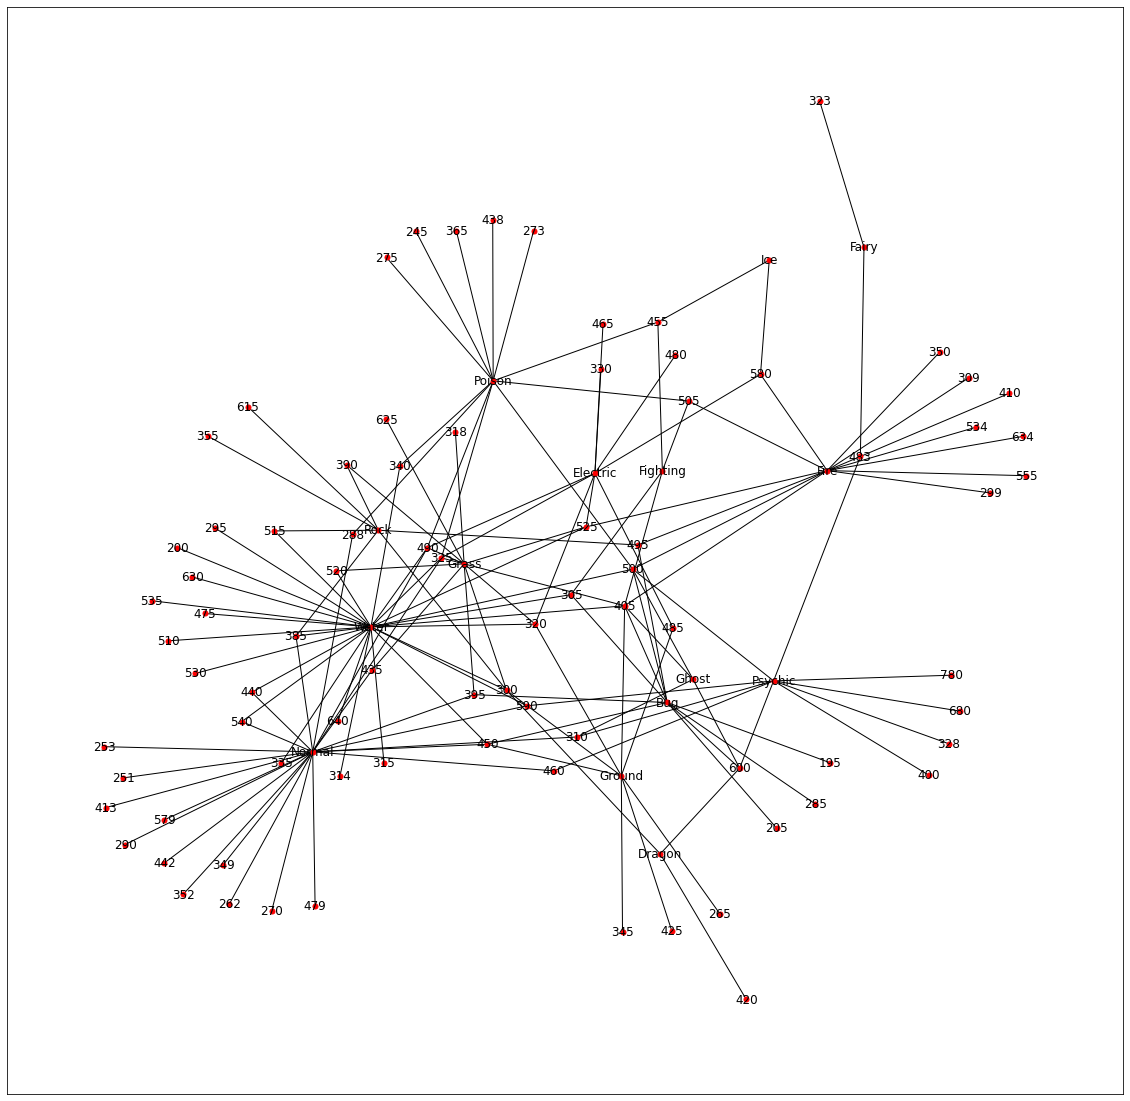

In [20]:
##analyzing the variation of total stats for each pokemon type for gen 1

data2_gen1=data2.loc[data2['Generation'] == 1]
# data2.loc[data2['Generation'] == '1']

g = nx.from_pandas_edgelist(data2_gen1,'Type 1','Total')
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='red')
plt.show()

In [13]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    #nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()



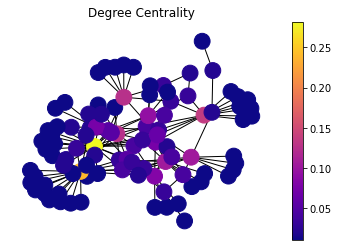

In [21]:
draw(g, pos, nx.degree_centrality(g), 'Degree Centrality')

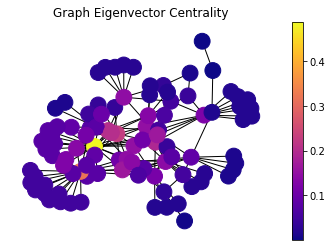

In [22]:
draw(g, pos, nx.eigenvector_centrality_numpy(g), 'Graph Eigenvector Centrality')


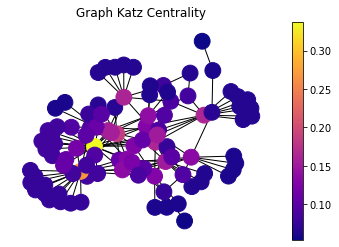

In [23]:
draw(g, pos, nx.katz_centrality(g, alpha=0.1, beta=1.0), 'Graph Katz Centrality')

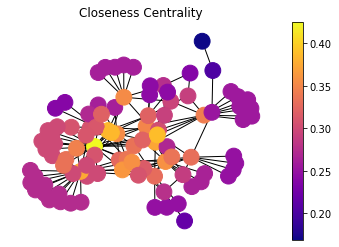

In [24]:
#page rank and hits were not performed as the graph is undirected
draw(g, pos, nx.closeness_centrality(g), 'Closeness Centrality')

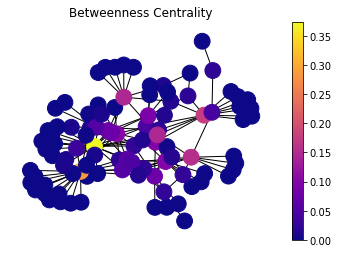

In [25]:
draw(g, pos, nx.betweenness_centrality(g), 'Betweenness Centrality')

In [26]:
len(g.nodes)
#generating graphs based on erdos renyi model for 97 nodes with varying probabilities

97

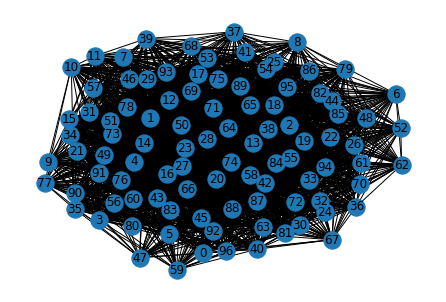

In [27]:
G= nx.erdos_renyi_graph(97,0.5)
nx.draw(G, with_labels=True)
plt.show()

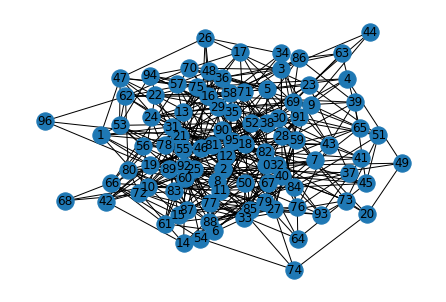

In [28]:
G= nx.erdos_renyi_graph(97,0.1)
nx.draw(G, with_labels=True)
plt.show()

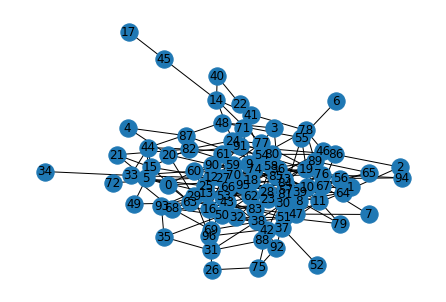

In [29]:
G= nx.erdos_renyi_graph(97,0.05)
nx.draw(G, with_labels=True)
plt.show()

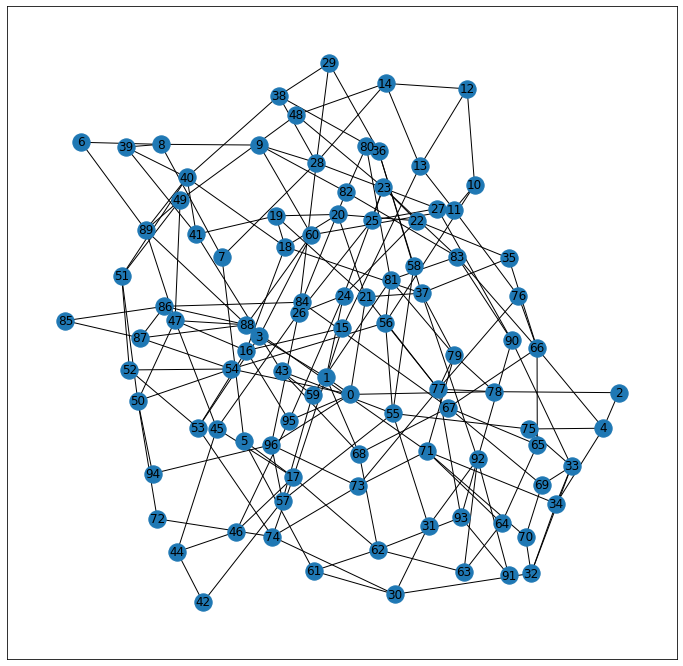

In [30]:
#ws models
G = nx.watts_strogatz_graph(n = 97, k=4,p = 0.5) 
plt.figure(figsize = (12, 12))
nx.draw_networkx(G)

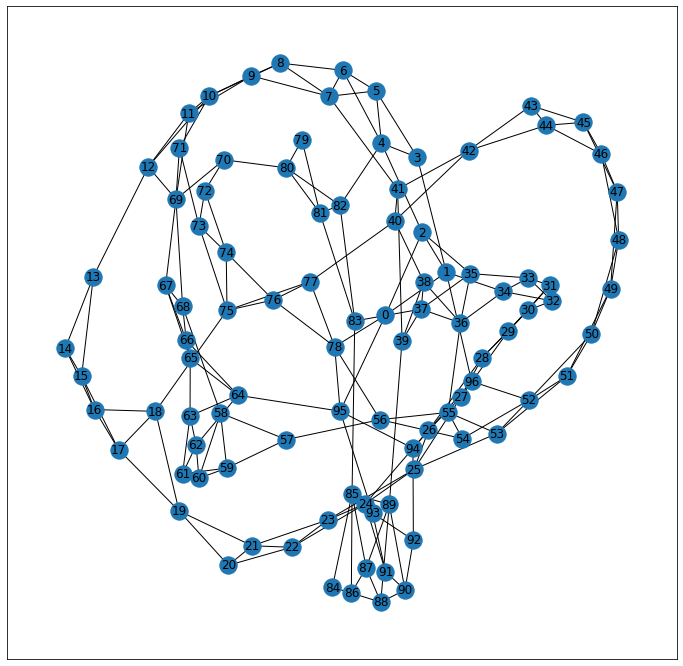

In [31]:
G = nx.watts_strogatz_graph(n = 97, k=4,p = 0.1) 
plt.figure(figsize = (12, 12))
nx.draw_networkx(G)

In [32]:
#cliques
#len(list(nx.find_cliques(g))) #there are 97 cliques in our graph
len(nx.number_of_cliques(g))

97

In [33]:
#grivan newman communities formation
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
len(sorted(map(sorted, next_level_communities))) #3 communities are formed with girvan newman technique

3

In [34]:
#k clique

len(list(nx.community.k_clique_communities(G, 3))[0]) #A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.


3

In [35]:
c = nx.community.greedy_modularity_communities(G)
#sorted(c[0]) #This function uses Clauset-Newman-Moore greedy modularity maximization [2] to find the community partition with the largest modularity.

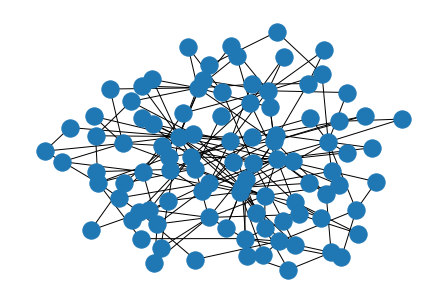

In [36]:
import networkx as nx
G=nx.barabasi_albert_graph(97,2)
nx.draw(G)